In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
train = pd.read_csv('./datasets/ihm/train.csv')
test = pd.read_csv('./datasets/ihm/test.csv')
val = pd.read_csv('./datasets/ihm/val.csv')
train = train.drop('Unnamed: 0', axis=1)
test = test.drop('Unnamed: 0', axis=1)
val = val.drop('Unnamed: 0', axis=1)

In [11]:
def split_df(df):
    split_set = []
    for episode, df_episode in df.groupby('Episode'):
        split_set.append(df_episode)
    return split_set

train_split = split_df(train)
val_split = split_df(val)
test_split = split_df(test)


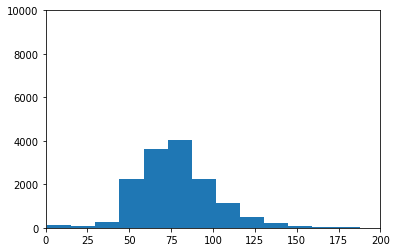

In [12]:
def plot_episode_lengths(df):
    patient_lengths = []
    for patient in df:
        patient_lengths.append(len(patient))
    plt.hist(patient_lengths,200)
    plt.axis([0,200,0,10000])
    plt.show()
    
    
plot_episode_lengths(train_split)

In [5]:
def fix_episode_length(df, rows, test=False):
    counter = 0
    counter_length = len(df)
    new_data  = []
    for patient in df:
        length = len(patient)
        patient = patient.copy()
        patient['Length'] = length
        if length < 25 and test == False : 
            continue
        elif length < rows:
            duplicate_data = []
            while length < rows:
                duplicate_data.append(patient.iloc[0])
                length=length+1
            new_data.append(pd.concat([pd.DataFrame(duplicate_data), patient], ignore_index=True))
        elif length > rows:
            new_data.append(patient.iloc[length-rows:])
            length-rows
        else:
            new_data.append(patient)
        counter = counter+1
        if counter %500 == 0:
            print(str(counter) + "/" + str(counter_length))

    return new_data

train_split = fix_episode_length(train_split, 90)
val_split = fix_episode_length(val_split, 90)
test_split = fix_episode_length(test_split, 90, test=True)

500/14681
1000/14681
1500/14681
2000/14681
2500/14681
3000/14681
3500/14681
4000/14681
4500/14681
5000/14681
5500/14681
6000/14681
6500/14681
7000/14681
7500/14681
8000/14681
8500/14681
9000/14681
9500/14681
10000/14681
10500/14681
11000/14681
11500/14681
12000/14681
12500/14681
13000/14681
13500/14681
14000/14681
14500/14681
500/3222
1000/3222
1500/3222
2000/3222
2500/3222
3000/3222
500/3236
1000/3236
1500/3236
2000/3236
2500/3236
3000/3236


In [6]:
train_split[0].head()

,Hours,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,...,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,Mortality,Episode,Length
0,0.015,0.0,59.0,0.21,Spontaneously,Obeys Commands,15.0,Oriented,304.0,86.0,...,77.0,98.0,19.0,118.0,36.6,81.0,7.4,0,10004_episode1_timeseries.csv,69
1,0.015,0.0,59.0,0.21,Spontaneously,Obeys Commands,15.0,Oriented,304.0,86.0,...,77.0,98.0,19.0,118.0,36.6,81.0,7.4,0,10004_episode1_timeseries.csv,69
2,0.015,0.0,59.0,0.21,Spontaneously,Obeys Commands,15.0,Oriented,304.0,86.0,...,77.0,98.0,19.0,118.0,36.6,81.0,7.4,0,10004_episode1_timeseries.csv,69
3,0.015,0.0,59.0,0.21,Spontaneously,Obeys Commands,15.0,Oriented,304.0,86.0,...,77.0,98.0,19.0,118.0,36.6,81.0,7.4,0,10004_episode1_timeseries.csv,69
4,0.015,0.0,59.0,0.21,Spontaneously,Obeys Commands,15.0,Oriented,304.0,86.0,...,77.0,98.0,19.0,118.0,36.6,81.0,7.4,0,10004_episode1_timeseries.csv,69


In [7]:
def make_patients_to_rows(df):
    new_dataframe = pd.DataFrame()
    counter = 0
    counter_length = len(df)
    for patient in df: 
        label = patient.iloc[0]["Mortality"]
        length = patient.iloc[0]["Length"]
        patient = patient.drop(['Mortality', 'Episode', 'Length'], axis=1)
        patient = patient.reset_index()
        patient = patient.drop('index', axis=1)
        data_row = pd.DataFrame()
        for i in range(0, len(patient)):
            
            columns = [str(col) + str(i) for col in patient.columns]
            temp_data = pd.DataFrame(patient.loc[i] )
            temp_data = temp_data.T
            temp_data.columns = columns
            temp_data = temp_data.reset_index()
            temp_data = temp_data.drop('index', axis=1)
            if i > 0:
                data_row = data_row.join(temp_data)
            else: 
                data_row = temp_data
        
        data_row['Mortality'] =label
        data_row['Length'] = length
        if counter == 0:
            new_dataframe = data_row
        else:
            new_dataframe = new_dataframe.append(data_row)
        counter=counter+1
        if counter %500 == 0:
            print(str(counter) + "/" + str(counter_length))
    return new_dataframe
            
train_data = make_patients_to_rows(train_split)
print("train done")
val_data = make_patients_to_rows(val_split)
print("val done")
test_data = make_patients_to_rows(test_split)

500/14523
1000/14523
1500/14523
2000/14523
2500/14523
3000/14523
3500/14523
4000/14523
4500/14523
5000/14523
5500/14523
6000/14523
6500/14523
7000/14523
7500/14523
8000/14523
8500/14523
9000/14523
9500/14523
10000/14523
10500/14523
11000/14523
11500/14523
12000/14523
12500/14523
13000/14523
13500/14523
14000/14523
14500/14523
train done
500/3188
1000/3188
1500/3188
2000/3188
2500/3188
3000/3188
val done
500/3236
1000/3236
1500/3236
2000/3236
2500/3236
3000/3236


In [8]:
train_data.to_csv('./datasets/ihm/train_data_90.csv')
test_data.to_csv('./datasets/ihm/test_data_90.csv')
val_data.to_csv('./datasets/ihm/val_data_90.csv')